# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### 1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### 1.1 Determinar los objetivos comerciales

 El objetivo es comprender qué factores hacen que un auto sea más o menos costoso o dicho de otro modo, que es lo que valoran 
 los clientes de una auto usado

#### 1.2 Evaluar la situación
**Recursos**<br>
Los recursos disponibles son:<br>
1. Un conjunto de datos de Kaggle, El conjunto de datos original contenía información sobre 3 millones de autos usados. El conjunto de datos proporcionado contiene información sobre 426,000 autos para garantizar la velocidad de procesamiento.<br>
2. Gerente comercial del concesionario de autos usados.<br>
3. Experto en mineria de datos.<br>
4. Una estación de trabajo con Wndows 11.<br>
5. Anaconda Navigator y Jupiter.<br>

**Requisitos**<br>
Tener la información disponible y el permiso para utilizarlos.
El proyecto tiene una duración de uan semana.<br>
**Supuestos**<br>
Los datos poporcionados no están actualizados a la fecha pero sirven para el análisis planteado porque suponemos que no hay mucha variación.<br>
**Restricciones**<br>
Hay restricciones en la capacidad de procesamiento de los datos originales de 3 millones de autos usados.<br>

#### 1.3 Determinar el objetivo de la minería de datos
Identificar que caracteríticas son mas valoradas por los clientes al comprar un auto usado, teniendo en cuenta los precios de autos usados de un periodo de años con información demográfica y principales características de los autos usados.

#### Producir plan de proyecto
![](images/plan.png)

### 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### 2.1 Recopilar datos
El dataset de vehículos que se nos ha proporcionado lo hemos cargado a la herramienta Jupiter Notebook. Los datos iniciales se encuentran en formato csv. El archivo se llama vehicles.csv y fue adquirido en Kagle.  https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data

#### 2.2 Describir datos

El dataset vehicles tiene 426,880 regisytos y 18 columnas.<br>
**id:** Es la identificación de los registros.<br>
**region:** Es la región de donde proviene el auto usado.<br>
**price:** Es el precio del autom+ovil usado.<br>
**year:** Es el año de fabrica del automóvil usado.<br>
**manufacturer:** Es el nombre del fabricante del automóvil.<br>
**model:** Es el modelo del automóvil<br>
**condition:** Es la condición del automóvil usado<br>
**cylinders:** Número de cilíndros del automóvil usado.<br>
**fuel:** Tipo de energía / combustible que necesita el automóvil usado.<br>
**odometer:** Kilometraje del automóvil usado.<br>
**title_status:** Estado del vehículo que se informa.<br>
**transmission:** Tipo de transmisión del vehículo usado.<br>
**VIN:** Vehicle Identification Number.<br>
**drive:** Tipo de tracción en las ruedas.<br>
**size:** Tipo de vehículo por tamaño.<br>
**type:** Tipo de vehículo por su carroceria.<br>
**paint_color:** Color del vehículo.<br>
**state:** Estado de procedencia del vehículo.<br>

In [163]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [165]:
df = pd.read_csv('data/vehicles.csv')

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [168]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


#### 2.3 Explorar datos

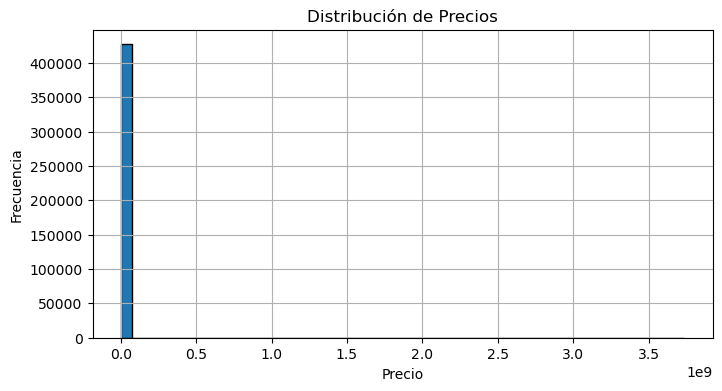

In [172]:
plt.figure(figsize=(8, 4))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [174]:
precio_menor_100000 = df[df.price < 100000]

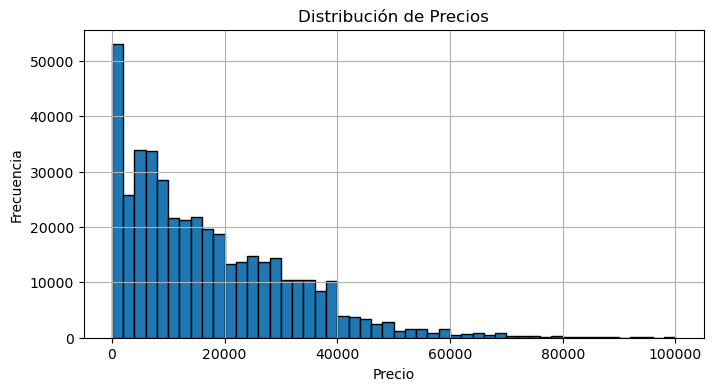

In [176]:
plt.figure(figsize=(8, 4))
plt.hist(precio_menor_100000['price'], bins=50, edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [178]:
print(f'Cantidad de registros de precios menores a 100,000:', len(precio_menor_100000))
print(f'Cantidad de registros de precios mayores a 100,000:', len(df) - len(precio_menor_100000))

Cantidad de registros de precios menores a 100,000: 426183
Cantidad de registros de precios mayores a 100,000: 697


In [180]:
precio_menor_100 = df[df.price < 100]

In [182]:
print(f'Cantidad de registros de precios menores a 100:', len(precio_menor_100))

Cantidad de registros de precios menores a 100: 36222


In [184]:
(df.isnull().sum()/len(df)) * 100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

#### 2.4 Verificar la calidad de los datos
Como se identificó en la exploración de datos, el target presenta errores, hay valores muy altos en el precio, 697 registros con precios mayores a 100,000 y valores muy pequeños (cero y negativos), 36.222 registros. <br>

Hay datos faltantes en algunas de las características del dataset de vehículos usados. Enseguida se muestra el % de datos faltantes.<br>
1. year 0.28% <br>
2. manufacturer 4.13%<br>
3. model 1.24%<br>
4. condition 40.79%<br>
5. cylinders 41.62%<br>
6. fuel 0.71%<br>
7. odometer 1.03%<br>
8. title_status 1.93%<br>
9. transmission 0.60%<br>
10. VIN 37.73%<br>
11. drive 30.59%<br>
12. size 71.77%<br>
13. type 21.75%<br>
14. paint_color 30.50%<br>


### 3. Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### 3.1 Seleccionar los datos
Datos que se incluirán y exluirán en el análisis.<br>

**1. id**, se **excluira** porque es un código de identificación que no aporta al análisis.<br>
**2. region**, se **incluirá**.<br>
**3. price**, se **incluirá** porque es el target.<br>
**4. year**, se **incluirá** porque es una característica importante.<br>
**5. manufacturer**, se **incluirá** porque es una característica importante.<br>
**6. model**, se **incluirá** porque es una característica importante.<br>
**7. condition**, se **incluirá**.<br>
**8. cylinders**, se **incluirá**.<br>
**9. fuel**, se **incluirá**.<br>
**10. odometer**, se **incluirá**.<br>
**11. title_status**, se **inclirá**.<br>
**12. transmission**, se **incluirá**.<br>
**13. VIN**, se **excluirá** porque es un código de identificación que no aporta al análisis.<br>
**14. drive**, se **incluirá**.<br>
**15. size**, se **excluirá** porque tiene un 71.77% de datos nulos.<br>
**16. type**, se **incluirá**.<br>
**17. paint_color**, se **incluirá**.<br>
**18. state**, se **incluirá**.<br>

Considerando que hay registros NaN en la diferentes características se buscará la forma de completarla con información de otras características.<br> 

#### 3.2 Datos limpios

In [191]:
# Registros de vehicle que tienen precios razonables para realizar el análisis. 
# Se han descartado los registros que tienen precios mayores a 100,000 y menores a 100.
# df1 es el Dataframe que contiene todos los registros que usaremos en el análisis.

In [272]:
df1 = df[(df.price >= 100)& (df.price < 100000)]

In [274]:
df_original = df1

In [282]:
warnings.filterwarnings("ignore")

<Axes: xlabel='price', ylabel='year'>

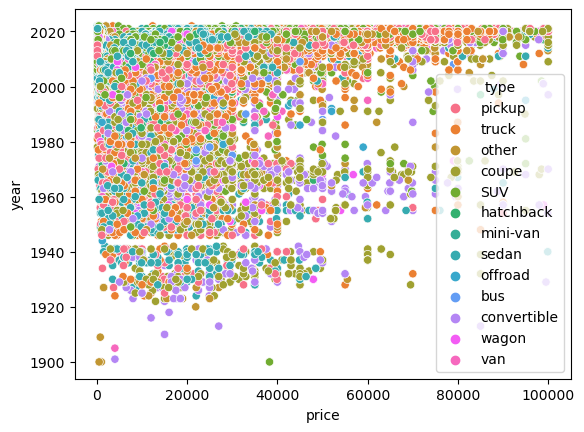

In [284]:
sns.scatterplot(data=df_original, x="price", y="year",hue="type")

<Axes: xlabel='price', ylabel='year'>

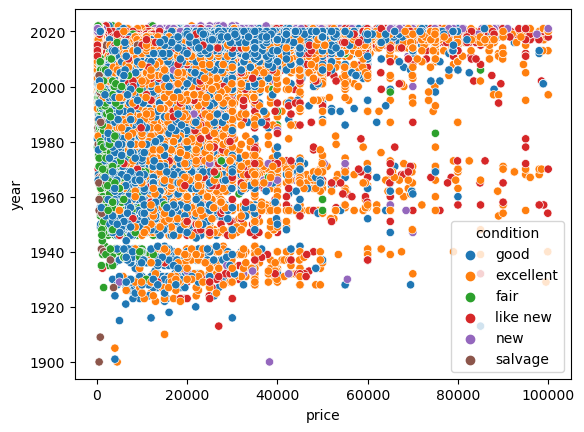

In [286]:
sns.scatterplot(data=df_original, x="price", y="year",hue="condition")

<Axes: xlabel='price', ylabel='odometer'>

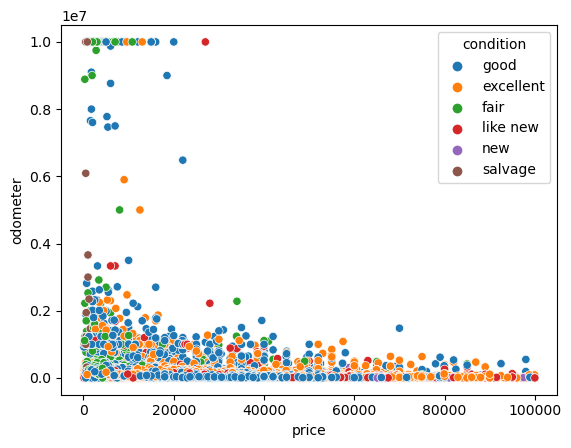

In [280]:
sns.scatterplot(data=df_original, x="price", y="odometer",hue="condition")

In [194]:
print(f'Cantidad de registros de precios mayor igual a 100 y menores de 100,000:', len(df1))

Cantidad de registros de precios mayor igual a 100 y menores de 100,000: 389961


In [195]:
# La nueva distribución porcentual de valores nulos en características ha cambiado por la elimineación de registros con precios de mala calidad
(df1.isnull().sum()/len(df1)) * 100

id               0.000000
region           0.000000
price            0.000000
year             0.300286
manufacturer     4.010401
model            1.156526
condition       38.266391
cylinders       40.611497
fuel             0.664169
odometer         0.583392
title_status     1.981224
transmission     0.465175
VIN             38.539239
drive           30.452789
size            72.072335
type            21.578055
paint_color     29.596293
state            0.000000
dtype: float64

In [196]:
df1 = df1.reset_index(drop=True)

In [197]:
# Imputar los valores NaN de manufacturer basado en la moda por grupo de 'model'
df1['manufacturer'] = df1['manufacturer'].fillna(
    df1.groupby(['model'])['manufacturer'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [198]:
# Imputar los valores NaN de model basado en la moda por grupo de 'manufacturer'
df1['model'] = df1['model'].fillna(
    df1.groupby(['manufacturer'])['model'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [205]:
# Imputar los valores NaN de year basado en la moda por grupo de 'manufacturer' y 'model'
df1['year'] = df1['year'].fillna(
    df1.groupby(['manufacturer', 'model'])['year'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [206]:
# Imputar los valores NaN de condition basado en la moda por grupo de 'manufacturer' y 'model'
df1['condition'] = df1['condition'].fillna(
    df1.groupby(['manufacturer', 'model'])['condition'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [209]:
# Imputar los valores NaN de cylinders basado en la moda por grupo de 'manufacturer' y 'model'
df1['cylinders'] = df1['cylinders'].fillna(
    df1.groupby(['manufacturer', 'model'])['cylinders'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [211]:
# Imputar los valores NaN de title_status basado en la moda por grupo de 'manufacturer' y 'model'
df1['title_status'] = df1['title_status'].fillna(
    df1.groupby(['manufacturer', 'model'])['title_status'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [213]:
# Imputar los valores NaN de drive basado en la moda por grupo de 'manufacturer' y 'model'
df1['drive'] = df1['drive'].fillna(
    df1.groupby(['manufacturer', 'model'])['drive'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [215]:
# Imputar los valores NaN de type basado en la moda por grupo de 'manufacturer' y 'model'
df1['type'] = df1['type'].fillna(
    df1.groupby(['manufacturer', 'model'])['type'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [217]:
# Imputar los valores NaN de paint_color basado en la moda por grupo de 'manufacturer' y 'model'
df1['paint_color'] = df1['paint_color'].fillna(
    df1.groupby(['manufacturer', 'model'])['paint_color'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [219]:
# Imputar los valores NaN de fuel basado en la moda por grupo de 'manufacturer' y 'model'
df1['fuel'] = df1['fuel'].fillna(
    df1.groupby(['manufacturer', 'model'])['fuel'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [221]:
# Imputar los valores NaN de odometer basado en la moda por grupo de 'manufacturer' y 'model'
df1['odometer'] = df1['odometer'].fillna(
    df1.groupby(['manufacturer', 'model'])['odometer'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [223]:
# Imputar los valores NaN de transmission basado en la moda por grupo de 'manufacturer' y 'model'
df1['transmission'] = df1['transmission'].fillna(
    df1.groupby(['manufacturer', 'model'])['transmission'].transform(
        lambda x: x.mode()[0] if not x.mode().empty else 'Desconocido'
    )
)

In [225]:
# Después de completar los datos faltantes se obtiene los siguientes porcentajes de nulos
# Recordar que id, VIN y size se encuentran excluidos del análisis

(df1.isnull().sum()/len(df1)) * 100

id               0.000000
region           0.000000
price            0.000000
year             0.015899
manufacturer     0.015899
model            0.015899
condition        0.015899
cylinders        0.015899
fuel             0.015899
odometer         0.015899
title_status     0.015899
transmission     0.015899
VIN             38.539239
drive            0.015899
size            72.072335
type             0.015899
paint_color      0.015899
state            0.000000
dtype: float64

In [227]:
len(df1)

389961

In [229]:
df1_sin_excluidas = df1.drop(columns=['id', 'VIN','size'])
df_sin_nan = df1_sin_excluidas.dropna()

In [231]:
len(df_sin_nan)

389899

In [233]:
df_sin_nan = df_sin_nan.reset_index(drop=True)

In [235]:
df2 = df_sin_nan

#### 3.3 Construir datos
No se construyen nuevos atributos.

#### 3.4 Integrar datos
No se realiza integración con otras tablas o datasets.

#### 3.5 Formatear datos
Las características que contienen categorías serán transformadas por requerimiento de la herramienta del modelado, que pueden ser One-Hot Encoding, Target Encoding, entre otras.

In [240]:
# Target Encoding para region
mean_target_encoding = df2.groupby('region')['price'].mean()
df2['region_target'] = df2['region'].map(mean_target_encoding)

In [242]:
# Target Encoding para manufacturer
mean_target_encoding = df2.groupby('manufacturer')['price'].mean()
df2['manufacturer_target'] = df2['manufacturer'].map(mean_target_encoding)

In [244]:
# Target Encoding para model
mean_target_encoding = df2.groupby('model')['price'].mean()
df2['model_target'] = df2['model'].map(mean_target_encoding)

In [246]:
# One-Hot Encoder para condition
encoder = OneHotEncoder(sparse_output=False)  # sparse=False para obtener un array denso
encoded_data = encoder.fit_transform(df2[['condition']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['condition']))
df_encoded = pd.concat([df2.drop('condition', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [248]:
# One-Hot Encoder para cylinders
encoded_data = encoder.fit_transform(df2[['cylinders']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['cylinders']))
df_encoded = pd.concat([df2.drop('cylinders', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [250]:
# One-Hot Encoder para fuel
encoded_data = encoder.fit_transform(df2[['fuel']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['fuel']))
df_encoded = pd.concat([df2.drop('fuel', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [252]:
# One-Hot Encoder para title_status
encoded_data = encoder.fit_transform(df2[['title_status']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['title_status']))
df_encoded = pd.concat([df2.drop('title_status', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [254]:
# One-Hot Encoder para transmission
encoded_data = encoder.fit_transform(df2[['transmission']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['transmission']))
df_encoded = pd.concat([df2.drop('transmission', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [256]:
# One-Hot Encoder para drive
encoded_data = encoder.fit_transform(df2[['drive']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['drive']))
df_encoded = pd.concat([df2.drop('drive', axis=1), encoded_df], axis=1)
df2 = df_encoded

In [258]:
# Target Encoding para type
mean_target_encoding = df2.groupby('type')['price'].mean()
df2['type_target'] = df2['type'].map(mean_target_encoding)

In [260]:
# Target Encoding para paint_color
mean_target_encoding = df2.groupby('paint_color')['price'].mean()
df2['paint_color_target'] = df2['paint_color'].map(mean_target_encoding)

In [262]:
# Target Encoding para state
mean_target_encoding = df2.groupby('state')['price'].mean()
df2['state_target'] = df2['state'].map(mean_target_encoding)

In [264]:
df_original = df2
df_original['year'] = df_original['year'].replace('Desconocido', np.nan)
df_original['odometer'] = df_original['odometer'].replace('Desconocido', np.nan)
df_original = df_original.dropna()
df_original = df_original.reset_index(drop=True)

In [98]:
df2 = df2.drop(columns=['region', 'manufacturer','model','type','paint_color','state' ])

In [100]:
odometer = df2[df2.odometer == "Desconocido"]
len(odometer)

353

In [102]:
df2['year'] = df2['year'].replace('Desconocido', np.nan)

In [104]:
df2['odometer'] = df2['odometer'].replace('Desconocido', np.nan)

In [106]:
df2 = df2.dropna()

In [108]:
df2 = df2.reset_index(drop=True)

In [110]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388631 entries, 0 to 388630
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price                     388631 non-null  int64  
 1   year                      388631 non-null  float64
 2   odometer                  388631 non-null  float64
 3   region_target             388631 non-null  float64
 4   manufacturer_target       388631 non-null  float64
 5   model_target              388631 non-null  float64
 6   condition_Desconocido     388631 non-null  float64
 7   condition_excellent       388631 non-null  float64
 8   condition_fair            388631 non-null  float64
 9   condition_good            388631 non-null  float64
 10  condition_like new        388631 non-null  float64
 11  condition_new             388631 non-null  float64
 12  condition_salvage         388631 non-null  float64
 13  cylinders_10 cylinders    388631 non-null  f

### 4. Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### 4.1 Seleccionar técnica de modelado

**Sequential Feature Selection**<br>
Utilizaremos la técnica de Sequential Feauture Selection para la identificación y selección de las características más importantes para el problema que se está abordando. De esta forma mejoramos el coste de cálculo necesario, reducimos la complejidad del modelo y mejoramos la precisión del modelo.


**Lasso y Ridge Regression**<br>
La selección de características es un paso crucial en el ciclo de vida de la ciencia de datos, ya que ayuda a reducir el ruido, mejorar el rendimiento del modelo y aumentar la interpretabilidad. Dos técnicas de regresión populares para la selección de características son Lasso y Ridge Regression. Lasso es un método de regularización que reduce los coeficientes hacia cero, lo que realiza de manera efectiva una forma de selección de características. Por el contrario, Ridge Regression utiliza una penalización L1 para controlar la fuerza de la regularización, que también puede conducir a la selección de características, pero es posible que no establezca ningún coeficiente en cero.
).

#### 4.2 Generar diseño de prueba

Se realizará una división de datos de entrnamiento y pruebas. El 70% de los datos corresponden a entrenamiento y el 30% a pruebas. Esta división lo realizaremos con la función: train_test_split

#### 4.3 Construir modelo

In [116]:
df3 = df2.sample(n=1000, random_state=42)

In [118]:
df3 = df3.reset_index(drop=True)

In [121]:
# Preparación de los datos
X = df3.drop(['price'], axis = 1)
y = df3['price']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Selección Secuencial de Características
#### con estimator LinearRegression()

In [341]:
# Definir el modelo de base para la selección de características secuencial
lasso_model = Lasso(alpha=0.1)  # Puedes ajustar el alpha según sea necesario
# Crear un Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator=LinearRegression(),
                                n_features_to_select=10,  # Ajusta esto al número de características deseadas
                                direction='forward',  # Puedes usar 'forward' o 'backward'
                                scoring='neg_mean_squared_error',
                                cv=10)  # Validación cruzada con 10 folds

# Incorporar el SFS al pipeline
scaled_sfs_model = Pipeline([
    ('Fer_transform', PolynomialFeatures(degree=3, include_bias=False)),
    ('Fer_scale', StandardScaler()),
    ('sfs', sfs)
])

In [343]:
# Ajuste del pipeline con los datos de entrenamiento
scaled_sfs_model.fit(X_train, y_train)

Pipeline(steps=[('Fer_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Fer_scale', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=10, estimator=LinearRegression(),
                                           n_features_to_select=10,
                                           scoring='neg_mean_squared_error'))])

In [347]:
# Supongamos que ya has definido y ajustado el modelo como en el código proporcionado

# Obtener los nombres de las características después de la transformación polinómica
feature_names = scaled_sfs_model.named_steps['Fer_transform'].get_feature_names_out(X_train.columns)

# Obtener las características seleccionadas
selected_features_mask = scaled_sfs_model.named_steps['sfs'].get_support()
selected_feature_names = feature_names[selected_features_mask]

# Crear un nuevo modelo de Lasso usando solo las características seleccionadas
X_train_selected = scaled_sfs_model.named_steps['Fer_transform'].transform(X_train)[:, selected_features_mask]
X_test_selected = scaled_sfs_model.named_steps['Fer_transform'].transform(X_test)[:, selected_features_mask]

# Reentrenar el modelo Lasso usando las características seleccionadas
#lasso_final = Lasso(alpha=0.1)
#lasso_final.fit(X_train_selected, y_train)
linear_reg = LinearRegression()
linear_reg.fit(X_train_selected, y_train)

y_train_pred = linear_reg.predict(X_train_selected)
y_test_pred = linear_reg.predict(X_test_selected)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Obtener los coeficientes del modelo final
selected_coefficients = linear_reg.coef_

# Crear un DataFrame para visualizar las características seleccionadas y sus coeficientes
coef_df = pd.DataFrame({
    'Característica': selected_feature_names,
    'Coeficiente': selected_coefficients
})

# Mostrar el DataFrame con las características seleccionadas y sus coeficientes
print(coef_df)
print(f"MSE en el conjunto de entrenamiento: {mse_train}")
print(f"MSE en el conjunto de prueba: {mse_test}")

                                                Característica   Coeficiente
0                                                     odometer -5.475835e-02
1                                          year^2 model_target  2.224144e-07
2                               odometer model_target fuel_gas -1.806334e-06
3            odometer condition_like new cylinders_8 cylinders -1.962138e-01
4      region_target title_status_clean transmission_automatic  3.118948e-01
5          condition_excellent cylinders_8 cylinders drive_4wd  6.308213e+03
6            condition_excellent fuel_other paint_color_target -5.073674e-01
7  condition_like new cylinders_8 cylinders paint_color_target  1.416435e+00
8  cylinders_Desconocido title_status_clean paint_color_target -1.778499e-01
9           fuel_gas title_status_clean transmission_automatic -3.938093e+03
MSE en el conjunto de entrenamiento: 51374997.46933378
MSE en el conjunto de prueba: 64685134.63370499


In [349]:
coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)
pd.set_option('display.max_colwidth', None)

print("\nCoeficientes asociados a cada característica:")
print(coef_df_sorted)


Coeficientes asociados a cada característica:
                                                Característica   Coeficiente
5          condition_excellent cylinders_8 cylinders drive_4wd  6.308213e+03
7  condition_like new cylinders_8 cylinders paint_color_target  1.416435e+00
4      region_target title_status_clean transmission_automatic  3.118948e-01
1                                          year^2 model_target  2.224144e-07
2                               odometer model_target fuel_gas -1.806334e-06
0                                                     odometer -5.475835e-02
8  cylinders_Desconocido title_status_clean paint_color_target -1.778499e-01
3            odometer condition_like new cylinders_8 cylinders -1.962138e-01
6            condition_excellent fuel_other paint_color_target -5.073674e-01
9           fuel_gas title_status_clean transmission_automatic -3.938093e+03


In [351]:
# Obtener la intersección (intercept) del modelo ajustado linearRegression()
intercept = linear_reg.intercept_

# Mostrar la intersección
print("Intersección del modelo:", intercept)

Intersección del modelo: 7218.494437582012


In [353]:
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
# Aplicar permutation_importance
result = permutation_importance(linear_reg, X_test_selected, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Característica': X_test_selected_df.columns,
    'Importancia media': result.importances_mean,
    'Desviación estándar': result.importances_std
})

# Ordenar el DataFrame por importancia media
importance_df = importance_df.sort_values(by='Importancia media', ascending=False)

# Mostrar el DataFrame con la importancia de las características
print("\nImportancia de las características según permutation_importance:")
print(importance_df)


Importancia de las características según permutation_importance:
                                                Característica  \
1                                          year^2 model_target   
0                                                     odometer   
7  condition_like new cylinders_8 cylinders paint_color_target   
4      region_target title_status_clean transmission_automatic   
9           fuel_gas title_status_clean transmission_automatic   
5          condition_excellent cylinders_8 cylinders drive_4wd   
2                               odometer model_target fuel_gas   
3            odometer condition_like new cylinders_8 cylinders   
8  cylinders_Desconocido title_status_clean paint_color_target   
6            condition_excellent fuel_other paint_color_target   

   Importancia media  Desviación estándar  
1       1.784110e+08         1.500298e+07  
0       2.248059e+07         3.726145e+06  
7       2.174586e+07         4.691887e+06  
4       1.294038e+07         2.

#### Selección Secuencial de Características
#### con estimator Lasso(alpha=0.1)

In [395]:
# Definir el modelo de base para la selección de características secuencial
lasso_model = Lasso(alpha=0.1)  # Puedes ajustar el alpha según sea necesario
# Crear un Sequential Feature Selector
sfs = SequentialFeatureSelector(estimator=lasso_model,
                                n_features_to_select=10,  # Ajusta esto al número de características deseadas
                                direction='forward',  # Puedes usar 'forward' o 'backward'
                                scoring='neg_mean_squared_error',
                                cv=10)  # Validación cruzada con 10 folds

# Incorporar el SFS al pipeline
scaled_sfs_model = Pipeline([
    ('Fer_transform', PolynomialFeatures(degree=3, include_bias=False)),
    ('Fer_scale', StandardScaler()),
    ('sfs', sfs)
])


In [397]:
# Ajuste del pipeline con los datos de entrenamiento
scaled_sfs_model.fit(X_train, y_train)

Pipeline(steps=[('Fer_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Fer_scale', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=10, estimator=Lasso(alpha=0.1),
                                           n_features_to_select=10,
                                           scoring='neg_mean_squared_error'))])

In [119]:
# Supongamos que ya has definido y ajustado el modelo como en el código proporcionado

# Obtener los nombres de las características después de la transformación polinómica
feature_names = scaled_sfs_model.named_steps['Fer_transform'].get_feature_names_out(X_train.columns)

# Obtener las características seleccionadas
selected_features_mask = scaled_sfs_model.named_steps['sfs'].get_support()
selected_feature_names = feature_names[selected_features_mask]

# Crear un nuevo modelo de Lasso usando solo las características seleccionadas
X_train_selected = scaled_sfs_model.named_steps['Fer_transform'].transform(X_train)[:, selected_features_mask]
X_test_selected = scaled_sfs_model.named_steps['Fer_transform'].transform(X_test)[:, selected_features_mask]

# Reentrenar el modelo Lasso usando las características seleccionadas
lasso_final = Lasso(alpha=0.1)
lasso_final.fit(X_train_selected, y_train)

y_train_pred = lasso_final.predict(X_train_selected)
y_test_pred = lasso_final.predict(X_test_selected)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Obtener los coeficientes del modelo final
selected_coefficients = lasso_final.coef_

# Crear un DataFrame para visualizar las características seleccionadas y sus coeficientes
coef_df = pd.DataFrame({
    'Característica': selected_feature_names,
    'Coeficiente': selected_coefficients
})

# Mostrar el DataFrame con las características seleccionadas y sus coeficientes
print(coef_df)
print(f"MSE en el conjunto de entrenamiento: {mse_train}")
print(f"MSE en el conjunto de prueba: {mse_test}")

                                      Característica   Coeficiente
0                                           odometer -5.475436e-02
1                                year^2 model_target  2.224226e-07
2                     odometer model_target fuel_gas -1.806582e-06
3  odometer condition_like new cylinders_8 cylinders -1.962116e-01
4  region_target title_status_clean transmission_...  3.118326e-01
5  condition_excellent cylinders_8 cylinders driv...  6.307049e+03
6  condition_excellent fuel_other paint_color_target -5.073166e-01
7  condition_like new cylinders_8 cylinders paint...  1.416410e+00
8  cylinders_Desconocido title_status_clean paint... -1.778539e-01
9  fuel_gas title_status_clean transmission_autom... -3.936262e+03
MSE en el conjunto de entrenamiento: 51374997.76882525
MSE en el conjunto de prueba: 64684302.299961165


In [123]:
coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)
pd.set_option('display.max_colwidth', None)

print("\nCoeficientes asociados a cada característica:")
print(coef_df_sorted)



Coeficientes asociados a cada característica:
                                                Característica   Coeficiente
5          condition_excellent cylinders_8 cylinders drive_4wd  6.307049e+03
7  condition_like new cylinders_8 cylinders paint_color_target  1.416410e+00
4      region_target title_status_clean transmission_automatic  3.118326e-01
1                                          year^2 model_target  2.224226e-07
2                               odometer model_target fuel_gas -1.806582e-06
0                                                     odometer -5.475436e-02
8  cylinders_Desconocido title_status_clean paint_color_target -1.778539e-01
3            odometer condition_like new cylinders_8 cylinders -1.962116e-01
6            condition_excellent fuel_other paint_color_target -5.073166e-01
9           fuel_gas title_status_clean transmission_automatic -3.936262e+03


In [127]:
# Obtener la intersección (intercept) del modelo ajustado Lasso
intercept = lasso_final.intercept_

# Mostrar la intersección
print("Intersección del modelo:", intercept)

Intersección del modelo: 7217.537748631461


In [129]:
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)
# Aplicar permutation_importance
result = permutation_importance(lasso_final, X_test_selected, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Característica': X_test_selected_df.columns,
    'Importancia media': result.importances_mean,
    'Desviación estándar': result.importances_std
})

# Ordenar el DataFrame por importancia media
importance_df = importance_df.sort_values(by='Importancia media', ascending=False)

# Mostrar el DataFrame con la importancia de las características
print("\nImportancia de las características según permutation_importance:")
print(importance_df)


Importancia de las características según permutation_importance:
                                                Característica  \
1                                          year^2 model_target   
0                                                     odometer   
7  condition_like new cylinders_8 cylinders paint_color_target   
4      region_target title_status_clean transmission_automatic   
9           fuel_gas title_status_clean transmission_automatic   
5          condition_excellent cylinders_8 cylinders drive_4wd   
2                               odometer model_target fuel_gas   
3            odometer condition_like new cylinders_8 cylinders   
8  cylinders_Desconocido title_status_clean paint_color_target   
6            condition_excellent fuel_other paint_color_target   

   Importancia media  Desviación estándar  
1       1.784270e+08         1.500410e+07  
0       2.247746e+07         3.725814e+06  
7       2.174568e+07         4.691860e+06  
4       1.293499e+07         2.

#### Regularización Ridgel

In [151]:
# Creación del modelo de regularización Ridgel
# Creación del pipeline
scaled_ridge_model = Pipeline([
    ('Fer_transform', PolynomialFeatures(degree=3, include_bias=False)),
    ('Fer_scale', StandardScaler()),
    ('Fer_regression', Ridge())
])

# Definición de los hiperparámetros a probar
parameters_to_try = {'Fer_regression__alpha': 10**np.linspace(-3,7,100)}
# Configuración de GridSearchCV
model_finder = GridSearchCV(estimator=scaled_ridge_model,
                            param_grid=parameters_to_try,
                            scoring="neg_mean_squared_error",
                            cv=10)  # Usando validación cruzada con 10 folds


In [153]:
# Ajuste del modelo con los datos de entrenamiento
model_finder.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
best_model = model_finder.best_estimator_
y_pred = best_model.predict(X_test)

# Imprimir resultados (opcional)
print("Mejor valor de alpha encontrado:", model_finder.best_params_)
print("Error cuadrático medio en el conjunto de prueba:", -model_finder.best_score_)

Mejor valor de alpha encontrado: {'Fer_regression__alpha': 385352.8593710535}
Error cuadrático medio en el conjunto de prueba: 164549761.5257855


In [155]:
coef = model_finder.best_estimator_.named_steps['Fer_regression'].coef_
print("Coeficientes del modelo:", coef)
coef.shape

Coeficientes del modelo: [  7.22157189 -11.57641255   3.54906373 ...   3.96775797   3.6232149
   2.39264623]


(17295,)

In [157]:
# Obtener la intersección (intercept) del modelo ajustado
intercept = model_finder.best_estimator_.named_steps['Fer_regression'].intercept_

# Mostrar la intersección
print("Intersección del modelo:", intercept)

Intersección del modelo: 19150.215714285714


In [159]:
# Obtener los nombres de las características después de la transformación
poly = model_finder.best_estimator_.named_steps['Fer_transform']
feature_names = poly.get_feature_names_out(X.columns)

print("Nombres de las características después de la transformación:")
print(feature_names)
# Obtener los coeficientes del modelo de regresión Ridge
coef = model_finder.best_estimator_.named_steps['Fer_regression'].coef_

# Crear un DataFrame para mostrar qué coeficiente corresponde a qué característica
coef_df = pd.DataFrame({'Característica': feature_names, 'Coeficiente': coef})

coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes asociados a cada característica:")
print(coef_df_sorted)


Nombres de las características después de la transformación:
['year' 'odometer' 'region_target' ... 'paint_color_target^2 state_target'
 'paint_color_target state_target^2' 'state_target^3']

Coeficientes asociados a cada característica:
                      Característica  Coeficiente
1084             year^2 model_target    15.044921
49                 year model_target    15.011565
4                       model_target    14.976856
1294  year model_target state_target    14.808469
259        model_target state_target    14.770256
...                              ...          ...
46                     year odometer   -11.556817
1                           odometer   -11.576413
1148          year odometer fuel_gas   -11.771294
113                odometer fuel_gas   -11.786111
2874             odometer fuel_gas^2   -11.786111

[17295 rows x 2 columns]


In [161]:
coef_df_sorted.head(20)

,Característica,Coeficiente
1084,year^2 model_target,15.044921
49,year model_target,15.011565
4,model_target,14.976856
1294,year model_target state_target,14.808469
259,model_target state_target,14.770256
1293,year model_target paint_color_target,14.632466
258,model_target paint_color_target,14.596821
1171,year region_target model_target,14.496369
136,region_target model_target,14.459358
5813,model_target paint_color_target state_target,14.398389


#### Regularización Lasso

In [131]:
# Creación del pipeline
scaled_lasso_model = Pipeline([
    ('Fer_transform', PolynomialFeatures(degree=3, include_bias=False)),
    ('Fer_scale', StandardScaler()),
    ('Fer_regression', Lasso())
])

# Definición de los hiperparámetros a probar
parameters_to_try = {'Fer_regression__alpha': 10**np.linspace(-3,7,100)}
# Configuración de GridSearchCV
model_finder = GridSearchCV(estimator=scaled_lasso_model,
                            param_grid=parameters_to_try,
                            scoring="neg_mean_squared_error",
                            cv=10)  # Usando validación cruzada con 10 folds

In [133]:
# Ajuste del modelo con los datos de entrenamiento
model_finder.fit(X_train, y_train)

# Evaluación en el conjunto de prueba
best_model = model_finder.best_estimator_
y_pred = best_model.predict(X_test)

# Imprimir resultados (opcional)
print("Mejor valor de alpha encontrado:", model_finder.best_params_)
print("Error cuadrático medio en el conjunto de prueba:", -model_finder.best_score_)

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+09, tolerance: 1.306e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.900e+09, tolerance: 1.295e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+09, to

Mejor valor de alpha encontrado: {'Fer_regression__alpha': 722.0809018385456}
Error cuadrático medio en el conjunto de prueba: 68304716.10912192


In [135]:
# Obtener la intersección (intercept) del modelo ajustado
intercept = model_finder.best_estimator_.named_steps['Fer_regression'].intercept_

# Mostrar la intersección
print("Intersección del modelo:", intercept)

Intersección del modelo: 19150.215714285714


In [137]:
# Obtener los nombres de las características después de la transformación
poly = model_finder.best_estimator_.named_steps['Fer_transform']
feature_names = poly.get_feature_names_out(X.columns)

print("Nombres de las características después de la transformación:")
print(feature_names)
# Obtener los coeficientes del modelo de regresión Ridge
coef = model_finder.best_estimator_.named_steps['Fer_regression'].coef_

# Crear un DataFrame para mostrar qué coeficiente corresponde a qué característica
coef_df = pd.DataFrame({'Característica': feature_names, 'Coeficiente': coef})

coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)

print("\nCoeficientes asociados a cada característica:")
print(coef_df_sorted)

Nombres de las características después de la transformación:
['year' 'odometer' 'region_target' ... 'paint_color_target^2 state_target'
 'paint_color_target state_target^2' 'state_target^3']

Coeficientes asociados a cada característica:
                                          Característica  Coeficiente
1084                                 year^2 model_target  4984.463481
3214       region_target model_target title_status_clean  1558.989062
1080                                              year^3   826.511226
1293                year model_target paint_color_target   792.144026
13600  cylinders_6 cylinders transmission_manual driv...   772.773266
...                                                  ...          ...
113                                    odometer fuel_gas   -82.942607
92                          odometer manufacturer_target  -176.178393
2223               odometer manufacturer_target fuel_gas  -495.211233
2264                      odometer model_target fuel_gas  -923

In [141]:
coef_df_sorted = coef_df.sort_values(by='Coeficiente', ascending=False)
pd.set_option('display.max_colwidth', None)

In [143]:
coef_df_sorted.head(20)

,Característica,Coeficiente
1084,year^2 model_target,4984.463481
3214,region_target model_target title_status_clean,1558.989062
1080,year^3,826.511226
1293,year model_target paint_color_target,792.144026
13600,cylinders_6 cylinders transmission_manual drive_fwd,772.773266
9172,condition_like new cylinders_8 cylinders paint_color_target,723.224417
7057,condition_excellent cylinders_8 cylinders drive_4wd,677.724775
8472,condition_good cylinders_6 cylinders transmission_manual,616.130806
5552,model_target fuel_diesel transmission_automatic,525.258963
5811,model_target type_target state_target,479.963017


In [145]:
print(best_model)

Pipeline(steps=[('Fer_transform',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('Fer_scale', StandardScaler()),
                ('Fer_regression', Lasso(alpha=722.0809018385456))])


In [147]:
train_preds = model_finder.predict(X_train)
test_preds = model_finder.predict(X_test)
model_train_mse = mean_squared_error(y_train, train_preds)
model_test_mse = mean_squared_error(y_test, test_preds)
model_best_alpha = model_finder.best_params_
### END SOLUTION

# Answer check
print(f'Train MSE: {model_train_mse}')
print(f'Test MSE: {model_test_mse}')
print(f'Best Alpha: {list(model_best_alpha.values())[0]}')

Train MSE: 52552741.21791425
Test MSE: 56886450.223902114
Best Alpha: 722.0809018385456


In [149]:
# Aplicar permutation_importance
result = permutation_importance(model_finder, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')
# Crear un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({
    'Característica': X.columns,
    'Importancia media': result.importances_mean,
    'Desviación estándar': result.importances_std
})

# Ordenar el DataFrame por importancia media
importance_df = importance_df.sort_values(by='Importancia media', ascending=False)

# Mostrar el DataFrame con la importancia de las características
print("\nImportancia de las características según permutation_importance:")
print(importance_df)


Importancia de las características según permutation_importance:
              Característica  Importancia media  Desviación estándar
4               model_target       1.316373e+08         1.083253e+07
1                   odometer       4.607297e+07         5.436064e+06
18     cylinders_8 cylinders       5.104614e+06         8.619039e+05
0                       year       3.765634e+06         9.067847e+05
9         condition_like new       2.983854e+06         1.444548e+06
17     cylinders_6 cylinders       2.659837e+06         1.876560e+06
38                 drive_4wd       2.538973e+06         6.855449e+05
36       transmission_manual       2.431307e+06         1.301633e+06
22               fuel_diesel       1.607224e+06         4.738299e+05
35    transmission_automatic       1.547504e+06         1.010861e+06
6        condition_excellent       1.371815e+06         7.344720e+05
24                  fuel_gas       1.201941e+06         4.128770e+05
2              region_target       9.

#### 4.4 Evaluar el Modelo

Enseguida se muestra los resultados obtenidos usando las técnicas de clasificación de características y de regularización.

**Sequential Feature Selection - Linear Regression**<br>
![](images/Sequential_Feature_Selection_LR.png)<br>
**Sequential Feature Selection - Lasso**<br>
![](images/Sequential_Feature_Selection_Lasso.png)<br>
**Regularización Ridgel**<br>
![](images/Regular_Ridgel.png)<br>
**Regularización Lasso**<br>
![](images/Regular_Lasso.png)<br>
**Permutation Importance**<br>
![](images/Permutation_Importance.png)<br>

Las tecnicas de regularización de Ridgel y Lasso están corrigiendo el sobreajuste sin embargo los MSE (Mean Square Error) que se han obtenido son demasiado grandes.


### 5. Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### 5.1 Evaluar resultados

Consideramos que el modelo Regularización de Lasso se encuentra mas alineado a los datos de vehículos usados.<br>
1.Según nuestro análisis la característica del año al cuadrado y modelo del vehículo (year^2 model_target) es lo más valorado por el cliente a la hora de adquirir un vehículo usado.<br>
2. Como segunda caraterítica de importancia se encuentra la región, modelo y el estatus limpio del vehículo usado (region_target, model_target y title_status_clean).<br>
3. Como tercera característica de iportancia se encuentra el año del vehículo (year^3)<br>
4. Cuarta características mas valorada se encuentra el año, el modelo y el color del vehículo (year model_target paint_color_target).<br>
5. La quinta característica valorada se encuentra 6 cilindros, transmisión manual y tracción fwd ( cylinders_6 cylinders transmission_manual drive_fwd)<br>



#### 5.2 Proceso de revisión

En el proceso de revisión nos hemos dado cuenta que hay valores erroneos en los datos de la característica odómetro. Hay aproximadamente 2,755 muestras con un odometer mayor a 300,000 Km. Estos valores deberan ser consultados con el negocio para confirmar el kilometraje máximo antes de separar las muestras.  

#### 5.3 Determinar los próximos pasos

Se decide no terminar el proyecto y pasar a una segunda iteración para mejorar los resultados. Se propondrá al negocio mayor tiempo para completar los sigueintes datos <br>
1. Datos faltantes de la característica fabricante (manufacturer), que puede identificarse conociendo el modelo (model) y tanbién en sentido contrario completar el modelo conociendo el frabricante.<br>
2. Validar la característica de condición para excluirlo considerando que un 41% tiene datos faltantes. Los datos faltantes se completaron con la moda del grupo de manufacturer y model, lo cuál no fue una buena idea.
3. La característica cylinders puede ser completada con ayuda del cliente, porque en la gran mayoria de los casos se puede determinar sabiendo la marca y el modelo (nanufacturer y model).


### 6. Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### 6.1 Implementación del plan

Se determina el plan de implementación del modelo seleccionado.

![](images/Plan_deployment.png)<br>

#### 6.2 Plan de seguimiento y mantenimiento
Estas son las tareas de seguimiento y mantenimiento
1. Monitorización de reglas de rendimiento.<br>
2. Detección y manejo de las deriva del modelo
3. Reentrenamiento del modelo con nuevos datos
4. Validación y control de calidad de los datos entrantes
5. Configuración de alertas y notificaciones ante errores
6. Revisión periodica con el equipo de negocio
7. Documentación continua de los cambios en el modelo y procesos

#### 6.3 Informe final

Este informe final de compromiso de mineria de datos incluye todos los entregables anteriores, resumiendo y organizando los resultados.

#### 6.4 Revisión del proyecto
**Que se hizo bien**

1. Se ha obtenido las características principales para realizar el análisis de cuales son las valoradas para el cliente en el momento de compra de un vehículo usado.

2. Se realizó una depuración de los precios menores a 100 dólares y mayores a 100,000 dólares porque se considero que estos datos eran erróneos y podría malograr el análisis.

3. La participación del personal de la tienda de autos usados en el proceso de incluir y excluir características para el análisis.

**Que puede mejorar**

1. Para ciertas características completar la información faltante de forma manual y no utilizando técnicas de agrupamiento y moda. Como se realizó con las características de manufacturer, model, condition y cylinder.

2. Realizar validación a las caracteríticas numéricas, como fue el caso de odometer que tenían datos mayores a 300,000 KM.

3. Mejorar la capacidades computacionales para poder tener una mayor número de muestras de entrenamiento y pruebas y se pueda obtener un modelo mas fiable.
